O projeto estuda a termodinâmica do ar no interior de um iglu e tem como diagrama de estoque e fluxos:
    <img src="IgluDiagrama1.png"/, width=600, height=400 style="float: center; margin: 0px 0px 10px 10px">
Que é regido pelas seguintes equações:
<img src="EquacoesIglu2.png"/, width=400, height=250 style="float: center; margin: 0px 0px 10px 10px">

    

In [171]:
from math import pi

'''def var(T0,t):
    Temp=T0[0]
    #Qp = (emissividade * o * AreaHumano * (Thumano**4)) * Npessoas
    Qp= 6*Npessoas
    Qf =  o * AreaFogo * Tfogo**4 * Nfogueira
    Qq = Qp + Qf
    R1=(kneve*AinternaIglu/espessura)**(-1)
    R2=(har*AinternaIglu)**(-1)
    RT=R1+R2
    Qr = (Temp - ta)/RT
    #Qr = (kneve*AinternaIglu/espessura+har*AinternaIglu)*(Temp - ta)
    dTdt = (1/(m0*car)) * (Qq-Qr) #Mudar o Cneve para C do ar
    return dTdt'''

def var(Tinterno, t):
    Qpessoas = 6 * Npessoas
    Qkudlik =  o * AreaKudlik * Tkudlik**4 * Nkudlik
    Qentrada = Qpessoas + Qkudlik
    R1 = espessura / (kneve * AinternaIglu)
    R2 = 1/(har * AinternaIglu)
    RT = R1 + R2
    Qsaida = (Tinterno - Tfora) / RT
    dTdt = (Qentrada - Qsaida) * (1/(m0*cneve))
    return dTdt


In [197]:
from math import pi
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

emissividade = 0.95
har = 15
o = 5.67 * 10**(-8)
AreaHumano = 2 #m2
Thumano = 273+37 #Kelvin
Npessoas = 5
#AreaFogo = 7.256*10**-3
AreaKudlik = 1.256*10**-3 * 7
#Tfogo = 1672
Tkudlik = 773
#Nfogueira = 1
Nkudlik = 2
kneve = 0.3
raio = 2
AinternaIglu = 4*pi*raio**2/2
Tfora = -22.15 + 273.15
T0 = [Tfora]
espessura = 0.33
volume_ar =  33.5103/2
densidade_ar = 1.2922
m0 = densidade_ar * volume_ar
cneve = 2090
car = 1005

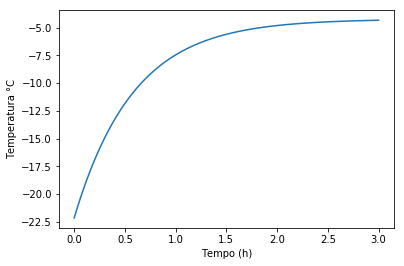

In [198]:
Tmax = 3*60*60
listaTempo = np.arange(0,Tmax,0.1)

solucao = odeint(var,T0,listaTempo)

TempC = [temp-273.15 for temp in solucao[:,0]]
TempoH = [t/3600 for t in listaTempo]

#plt.plot(listaTempo/3600,solucao-273.15)
plt.plot(TempoH,TempC)
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura °C')
plt.show()

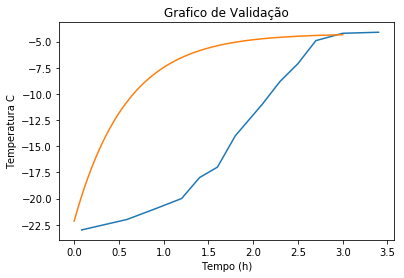

In [183]:


Tempo = [0.084, 0.59, 0.90, 1.2, 1.4, 1.6, 1.8, 2.0, 2.1, 2.3, 2.5 ,2.7, 3.0, 3.4]
Temperatura = [-23,-22,-21,-20,-18,-17,-14,-12,-11,-8.8,-7.1,-4.9,-4.2,-4.1]

plt.plot(Tempo,Temperatura)
plt.plot(TempoH,TempC)
plt.title("Grafico de Validação")
plt.ylabel('Temperatura C')
plt.xlabel("Tempo (h)")
plt.show()

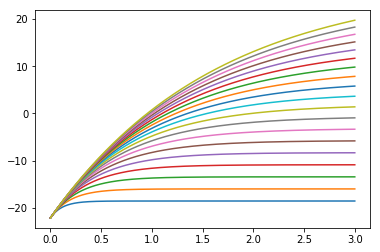

In [202]:
for espessura in np.arange(0.05,1,0.05):
    solucao = odeint(var,T0,listaTempo)
    TempC = [temp-273.15 for temp in solucao[:,0]]
    TempoH = [t/3600 for t in listaTempo]
    plt.plot(TempoH,TempC)
plt.show()